In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import torch
import random
from shutil import copyfile

In [202]:
EMOTIONS = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"]

# 1. Auxiliary functions

In [ ]:
EMOTIONS_PATH = "/Users/samuilstoychev/ckplus/CK+/Emotion"
IMAGES_PATH = "/Users/samuilstoychev/ckplus/CK+/cohn-kanade-images" 

In [ ]:
def listdir(path):
    """List all items in a given directory (in ascending order)."""
    res = []
    for f in os.listdir(path):
        if not f.startswith('.'):
            res.append(f)
    return sorted(res)

In [ ]:
def get_images(subject, sample): 
    folder = "/".join([IMAGES_PATH, subject, sample])
    images = listdir(folder)
    neutral = folder + "/" + images[0]
    emotional = [folder + "/" + img for img in [images[-3], images[-2], images[-1]]]
    return (neutral, emotional)

# 2. Allocating images to emotions

In [ ]:
subjects = listdir(EMOTIONS_PATH) 

In [ ]:
data = [[] for _ in range(8)] 

for subj in subjects: 
    samples = listdir(EMOTIONS_PATH + "/" + subj) 
    for samp in samples: 
        files = listdir(EMOTIONS_PATH + "/" + subj + "/" + samp)
        if len(files) is not 0: 
            fsubj, fsample, _, _ = files[0].split("_")
            emotion = open(EMOTIONS_PATH + "/" + subj + "/" + samp + "/" + files[0], "r").read().strip()
            emotion = int(float(emotion)) 
            neutral, emotional = get_images(fsubj, fsample)
            data[0].append(neutral)
            data[emotion] += emotional

### Distribution of emotions

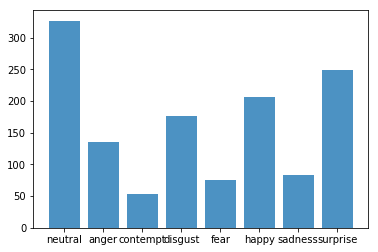

Distribution of emotions: [327, 135, 54, 177, 75, 207, 84, 249]
Images in total: 1308


In [211]:
dist = [len(data[x]) for x in range(8)]
y_pos = np.arange(len(EMOTIONS))

plt.bar(y_pos, dist, align='center', alpha=0.8)
plt.xticks(y_pos, EMOTIONS)

plt.show()
print("Distribution of emotions:", dist)
print("Images in total:", sum(dist))

# 3. Splitting into train and test

In [213]:
def split_train_test(data, test_ratio=0.2): 
    train = [] 
    test = [] 
    
    for x in data: 
        random.shuffle(x)
        split_point = int(test_ratio * len(x))
        train.append(x[split_point:])
        test.append(x[:split_point])
    return (train, test)

In [192]:
train_data, test_data = split_train_test(data)

# 4. Copy into new directory

In [227]:
# NEW_FOLDER_TRAIN = "/Users/samuilstoychev/ckplus_preprocessed/train/"
# NEW_FOLDER_TEST = "/Users/samuilstoychev/ckplus_preprocessed/test/"
# for emotion_index in range(8): 
#     train_folder = NEW_FOLDER_TRAIN + "class_" + str(emotion_index) + "/" 
#     test_folder = NEW_FOLDER_TEST + "class_" + str(emotion_index) + "/" 
    
#     for img_address in train_data[emotion_index]: 
#         filename = img_address.split("/")[-1]
#         copyfile(img_address, train_folder + filename)
#     for img_address in test_data[emotion_index]: 
#         filename = img_address.split("/")[-1]
#         copyfile(img_address, test_folder + filename)
    

In [2]:
from torchvision import datasets, transforms
from PIL import Image

In [25]:
ck_transforms = transforms.Compose([
    transforms.CenterCrop((490, 640)),
    transforms.Grayscale(), 
    transforms.Resize((490//5, 640//5)), 
    transforms.ToTensor(),
])

In [26]:
sample_train = datasets.DatasetFolder("/Users/samuilstoychev/Desktop/sample_train", 
                                      loader=lambda x: Image.open(x), extensions=["png"], 
                                      transform=ck_transforms)